In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [3]:
def loadDataFrame():
    df = pd.read_csv("customers.csv")
    df = df[['Age','Income']]
    
    df['Age'] = scale(df['Age'])
    df['Income'] = scale(df['Income'])
    
    return df

# KMeans

In [6]:
df = loadDataFrame()
model = KMeans(n_clusters= 3 )
model.fit(df)

KMeans(n_clusters=3)

In [8]:
labels = model.labels_
labels

array([1, 1, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [9]:
df["cluster"] = labels
df.head(5)

,Age,Income,cluster
0,0.742915,-0.718459,1
1,1.489490,1.384325,1
2,-0.252518,0.268032,0
3,-0.750235,-0.718459,0
4,1.489490,5.356249,2


In [10]:
df.groupby('cluster').mean()

,Age,Income
cluster,,
0,-0.745990,-0.416566
1,0.870738,0.132960
2,1.225993,2.970447


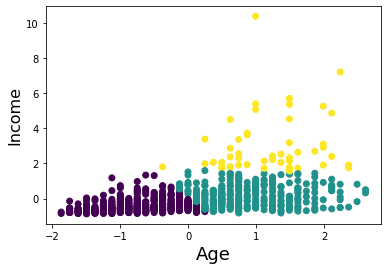

In [11]:
plt.scatter(df['Age'],df['Income'],c=labels)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Income', fontsize = 16)
plt.show()

# Agglomorative

In [13]:
df = loadDataFrame()
model = AgglomerativeClustering(n_clusters= 4)
model.fit(df)
labels = model.labels_
print(labels)

[2 0 2 3 0 1 2 1 3 0 1 2 3 1 3 3 3 2 1 2 3 2 3 1 0 1 3 2 2 2 1 2 3 2 3 2 2
 2 3 0 3 0 3 0 1 1 3 3 3 2 1 2 3 1 2 2 2 3 1 1 2 2 2 1 3 2 2 3 2 3 2 1 2 3
 3 2 2 2 0 1 2 2 0 2 1 3 3 3 3 3 2 2 2 3 2 1 2 2 2 3 2 0 2 1 3 1 2 3 2 1 2
 3 2 3 2 2 3 2 2 2 3 3 2 2 2 1 2 3 3 3 2 2 2 2 3 2 1 3 1 2 2 3 3 3 2 3 2 1
 3 3 2 1 2 1 2 2 0 1 3 2 3 2 2 2 3 2 2 2 3 1 1 2 2 3 2 1 2 3 3 1 2 2 3 0 2
 3 1 2 2 1 2 1 2 2 1 2 3 1 0 2 0 2 3 2 1 1 2 0 1 3 2 2 2 1 2 3 1 3 2 1 3 0
 2 3 2 2 1 3 2 1 2 2 3 3 1 3 2 3 2 3 2 2 3 3 2 0 1 2 2 3 3 3 2 2 1 3 2 3 3
 3 2 2 2 3 1 1 2 2 2 2 2 3 2 2 2 3 3 2 3 3 3 0 0 3 0 2 2 3 1 2 2 2 2 2 3 3
 3 3 3 1 1 2 3 2 2 2 2 2 2 2 2 3 1 3 2 3 2 2 2 2 1 2 1 3 3 2 3 3 2 2 2 0 3
 1 2 1 3 1 2 1 2 2 2 1 1 2 3 2 3 2 0 3 2 2 3 1 1 2 2 3 0 2 3 3 1 3 1 0 0 2
 3 3 1 1 2 2 3 2 2 3 2 3 3 1 0 2 1 3 2 2 2 2 2 2 3 2 3 0 2 2 3 3 3 3 2 1 1
 1 2 1 3 2 3 2 3 1 2 2 2 2 2 2 3 2 1 1 2 1 2 3 2 2 2 3 1 2 2 2 1 2 2 2 2 0
 2 3 2 2 1 2 1 2 3 2 0 2 3 2 3 1 1 0 3 2 3 1 2 2 2 1 1 2 2 1 1 3 2 2 3 3 3
 2 2 3 2 2 2 1 3 3 3 1 2 

In [14]:
df["cluster"] = labels
df.head(5)

,Age,Income,cluster
0,0.742915,-0.718459,2
1,1.489490,1.384325,0
2,-0.252518,0.268032,2
3,-0.750235,-0.718459,3
4,1.489490,5.356249,0


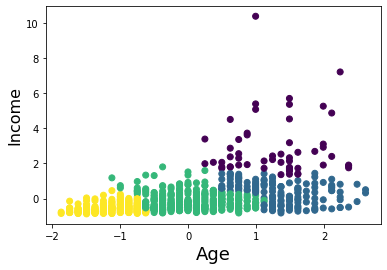

In [15]:
plt.scatter(df['Age'],df['Income'],c=labels)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Income', fontsize = 16)
plt.show()

# DB Scan

In [19]:
df = loadDataFrame()
dbscan = DBSCAN(eps=.5,min_samples=7)
dbscan.fit(df)
labels = dbscan.labels_
print(labels)

[ 0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

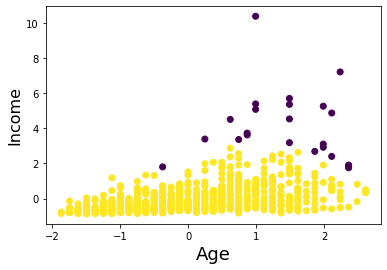

In [20]:
plt.scatter(df['Age'],df['Income'],c=labels)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Income', fontsize = 16)
plt.show()